In [22]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from skimage import measure, io
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# 37. Machine Learning

## 37.1 Feature Extraction

Definitions of the database, classes and images

In [23]:
repository = './images/images_Kimia216/'
classes = ['bird', 'bone', 'brick', 'camel', 'car', 'children',
           'classic', 'elephant', 'face', 'fork', 'fountain',
           'glass', 'hammer', 'heart', 'key', 'misk', 'ray', 'turtle']
nbClasses = len(classes)
nbImages = 12

The features are manually computed

In [24]:
properties = np.zeros((nbClasses * nbImages, 9))
target = np.zeros(nbClasses * nbImages)
index = 0

for class_id, class_name in enumerate(classes):
    filelist = glob.glob(repository+class_name+'*')
    for filename in filelist:
        I = io.imread(filename)
        prop = measure.regionprops(I)
        properties[index, 0] = prop[0].area
        properties[index, 1] = prop[0].convex_area
        properties[index, 2] = prop[0].eccentricity
        properties[index, 3] = prop[0].equivalent_diameter
        properties[index, 4] = prop[0].extent
        properties[index, 5] = prop[0].major_axis_length
        properties[index, 6] = prop[0].minor_axis_length
        properties[index, 7] = prop[0].perimeter
        properties[index, 8] = prop[0].solidity
        target[index] = class_id

        index = index+1


Here is the array of `properties`

In [25]:
pd.DataFrame(properties, columns=['area', 'convex_area', 'eccentricity', 'equivalent_diameter', 'extent', 'major_axis_length', 'minor_axis_length', 'perimeter','solidity'])

,area,convex_area,eccentricity,equivalent_diameter,extent,major_axis_length,minor_axis_length,perimeter,solidity
0,7898.0,12420.0,0.499498,100.279838,0.635910,152.773375,132.349850,875.972655,0.635910
1,7317.0,11040.0,0.514091,96.520950,0.662772,138.692034,118.961119,819.161472,0.662772
2,7053.0,10350.0,0.598079,94.763698,0.681449,141.722955,113.582016,806.238636,0.681449
3,7146.0,10350.0,0.641950,95.386423,0.690435,143.736282,110.209232,830.108694,0.690435
4,5321.0,8280.0,0.806141,82.309827,0.642633,149.171428,88.268306,754.096500,0.642633
...,...,...,...,...,...,...,...,...,...
211,5713.0,9890.0,0.712867,85.287851,0.577654,154.604019,108.423749,779.238636,0.577654
212,6172.0,11500.0,0.642686,88.647811,0.536696,162.205061,124.270179,851.836616,0.536696
213,5697.0,10074.0,0.841331,85.168337,0.565515,186.382480,100.743494,850.037626,0.565515
214,6112.0,10270.0,0.789741,88.215872,0.595131,170.854392,104.808889,848.694480,0.595131


## 37.2 Image classification

We are going the classify the image with `MLP (Multi-Layer Perceptron) Classfier`

In [26]:
# percentage of the data used for splitting into train/test
percentTest = .3
# the data are first scaled
propertiesMLP = StandardScaler().fit_transform(properties)
prop_train, prop_test, target_train, target_test = train_test_split(propertiesMLP, target, test_size=percentTest, random_state=0)

### MLP Classifier (Multi-Layer Perceptron)

In [27]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), solver='lbfgs')
target_pred = mlp.fit(prop_train, target_train).predict(prop_test)

print("Training set score: %f" % mlp.score(prop_train, target_train))
print(confusion_matrix(target_test, target_pred))
print(classification_report(target_test, target_pred, target_names=classes))

Training set score: 1.000000
[[3 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
              precision    recall  f1-score   support

        bird       0.75      0.75      0.75         4
        bone       1.00      1.00      1.00         6
       brick       1.00      1.00      1.00         2
       camel       1.00      0.75      0.86        

In [28]:
def plot_cm(cm, classes, normalize=False, cmap=plt.cm.Blues):
    """
    Plot confusion matrix
    cm: confusion matrix, as ouput by sklearn.metrics.confusion_matrix
    classes: labels to be used
    normalize: display number (False by default) or fraction (True)
    cmap: colormap

    returns: figure that can be used for pdf export
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fmt = '.1f' if normalize else 'd'
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)

    fig = plt.figure()
    sn.set(font_scale=.8)
    sn.heatmap(df_cm, annot=True, cmap=cmap, fmt=fmt)
    plt.xlabel('Target label')
    plt.ylabel('True label')

    return fig


### Compute confusion matrix

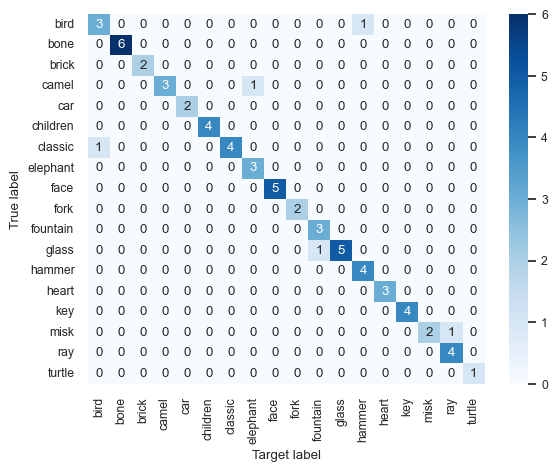

In [29]:
cnf_matrix = confusion_matrix(target_test, target_pred)
# fig = plot_cm(cnf_matrix, classes, normalize=True)
# fig.savefig("confusion_norm_mlp.pdf", bbox_inches='tight')
fig = plot_cm(cnf_matrix, classes)
# fig.savefig("confusion_mlp.pdf", bbox_inches='tight')

Training set score: 1.000000
              precision    recall  f1-score   support

        bird       0.60      0.75      0.67         4
        bone       0.83      0.83      0.83         6
       brick       1.00      1.00      1.00         2
       camel       1.00      0.25      0.40         4
         car       0.67      1.00      0.80         2
    children       1.00      1.00      1.00         4
     classic       1.00      0.80      0.89         5
    elephant       1.00      1.00      1.00         3
        face       1.00      1.00      1.00         5
        fork       1.00      1.00      1.00         2
    fountain       0.60      1.00      0.75         3
       glass       1.00      0.83      0.91         6
      hammer       0.75      0.75      0.75         4
       heart       1.00      1.00      1.00         3
         key       1.00      0.75      0.86         4
        misk       0.67      0.67      0.67         3
         ray       0.60      0.75      0.67         

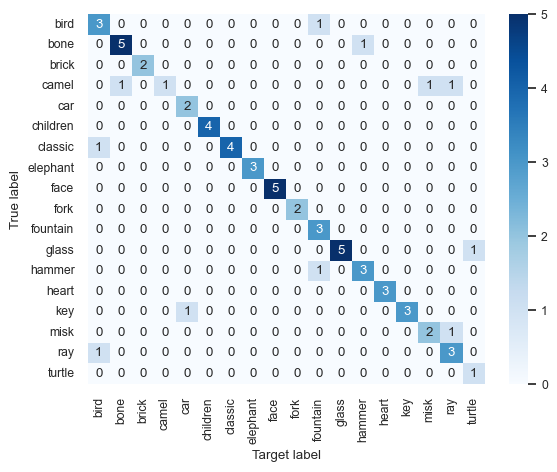

In [30]:
# SVM classifier
prop_train, prop_test, target_train, target_test = train_test_split(properties, target, test_size=percentTest,
                                                                    random_state=0)
classifier = svm.SVC(kernel='linear')
target_pred = classifier.fit(prop_train, target_train).predict(prop_test)
print("Training set score: %f" % classifier.score(prop_train, target_train))

print(classification_report(target_test, target_pred, target_names=classes))
# Compute confusion matrix
cnf_matrix = confusion_matrix(target_test, target_pred)


# fig = plot_cm(cnf_matrix, classes, normalize=True)
# fig.savefig("confusion_norm_svm.pdf", bbox_inches='tight')
fig = plot_cm(cnf_matrix, classes)
# fig.savefig("confusion_svm.pdf", bbox_inches='tight')